# Test0

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [0]:
def nowtime(past):
    now = time.time()
    print(now)
    print("period[second] : {}".format(now - past) )
    return now

In [0]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


label = [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


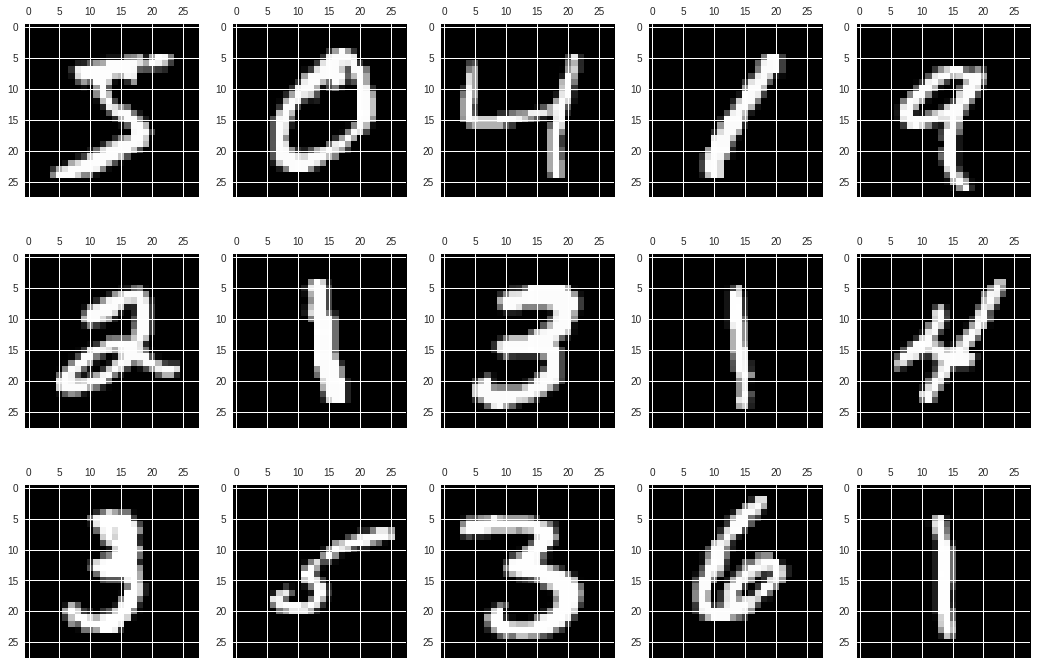

In [0]:
figure, axes = plt.subplots(nrows=3, ncols=5)
figure.set_size_inches(18, 12)

plt.gray()
print("label = {0}".format(y_train[0:15]))

cnt = 0
row = 0
for i in range(3):
    axes[i][0].matshow(X_train[cnt + 0])
    axes[i][1].matshow(X_train[cnt + 1])
    axes[i][2].matshow(X_train[cnt + 2])
    axes[i][3].matshow(X_train[cnt + 3])
    axes[i][4].matshow(X_train[cnt + 4])
    cnt += 5

In [0]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [0]:
y_train_hot = np.eye(10)[y_train]

print(y_train[0:5])
y_train_hot[0:5]

[5 0 4 1 9]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [0]:
y_test_hot = np.eye(10)[y_test]

print(y_test[0:5])
y_test_hot[0:5]

[7 2 1 0 4]


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

0.00012339457598623172
0.5
0.9998766054240137


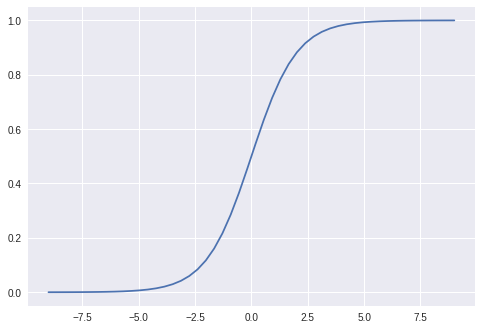

In [0]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-9.0, stop=+9.0)
yy = sigmoid(xx)

plt.plot(xx, yy)

print(sigmoid(-9))
print(sigmoid(0))
print(sigmoid(+9))

In [0]:
learning_rate = 0.0001

w1 = np.random.uniform(low=-0.058, high=+0.058, size=(784, 1000))  #-0.058, 0.058
w2 = np.random.uniform(low=-0.077, high=+0.077, size=(1000, 10))   # -0.077, 0.077

num_epoch = 100

In [74]:
x=5
y=3
z=(x != y).mean()
print(z)

AttributeError: ignored

In [0]:
pasttime=0
pasttime=nowtime(pasttime)

for epoch in range(num_epoch):
    # Forward propagation
    layer1 = X_train.dot(w1)
    layer1_out = sigmoid(layer1)
    layer2 = layer1_out.dot(w2)
    layer2_out = sigmoid(layer2)
    
    predict = np.argmax(layer2_out, axis=1)
    error = (predict != y_train).mean()
    if error < 0.01:
        break

    if epoch % 10 == 0:
        print("{0:3} error = {1:.5f}".format(epoch, error))
        print("{0:3} w1(mean) = {1:.5f}, w1(std) = {2:.5f}".format(epoch, w1.mean(), w1.std()))
        print("{0:3} w2(mean) = {1:.5f}, w2(std) = {2:.5f}".format(epoch, w2.mean(), w2.std()))
        print("----" * 11)

    # Backpropagation
    d2 = layer2_out - y_train_hot
    d1 = d2.dot(w2.T) * layer1_out * (1 - layer1_out)

    w2 = w2 - learning_rate * layer1_out.T.dot(d2)
    w1 = w1 - learning_rate * X_train.T.dot(d1)

print("{0:3} error = {1:.5f}".format(epoch, error))
pasttime=nowtime(pasttime)

1552352060.8634832
period[second] : 1552352060.8634832
  0 error = 0.88332
  0 w1(mean) = 0.00006, w1(std) = 0.03347
  0 w2(mean) = -0.00081, w2(std) = 0.04456
--------------------------------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


 10 error = 0.88763
 10 w1(mean) = -0.03346, w1(std) = 0.25762
 10 w2(mean) = -1.17396, w2(std) = 0.94203
--------------------------------------------
 20 error = 0.88763
 20 w1(mean) = -0.03347, w1(std) = 0.25764
 20 w2(mean) = -1.17300, w2(std) = 1.01466
--------------------------------------------
 30 error = 0.90137
 30 w1(mean) = -0.03358, w1(std) = 0.25771
 30 w2(mean) = -1.37546, w2(std) = 1.26306
--------------------------------------------
 40 error = 0.89782
 40 w1(mean) = -0.03358, w1(std) = 0.25771
 40 w2(mean) = -1.37618, w2(std) = 1.23409
--------------------------------------------
 50 error = 0.89782
 50 w1(mean) = -0.03358, w1(std) = 0.25771
 50 w2(mean) = -1.37615, w2(std) = 1.24095
--------------------------------------------
 60 error = 0.89782
 60 w1(mean) = -0.03358, w1(std) = 0.25771
 60 w2(mean) = -1.37608, w2(std) = 1.28383
--------------------------------------------
 70 error = 0.90965
 70 w1(mean) = -0.03358, w1(std) = 0.25771
 70 w2(mean) = -1.24977, w2(std

1552353503.4329004
period[second] : 11.272558212280273


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


label = [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]
Accuracy = 0.10100
1552353504.627133
period[second] : 1.19423246383667


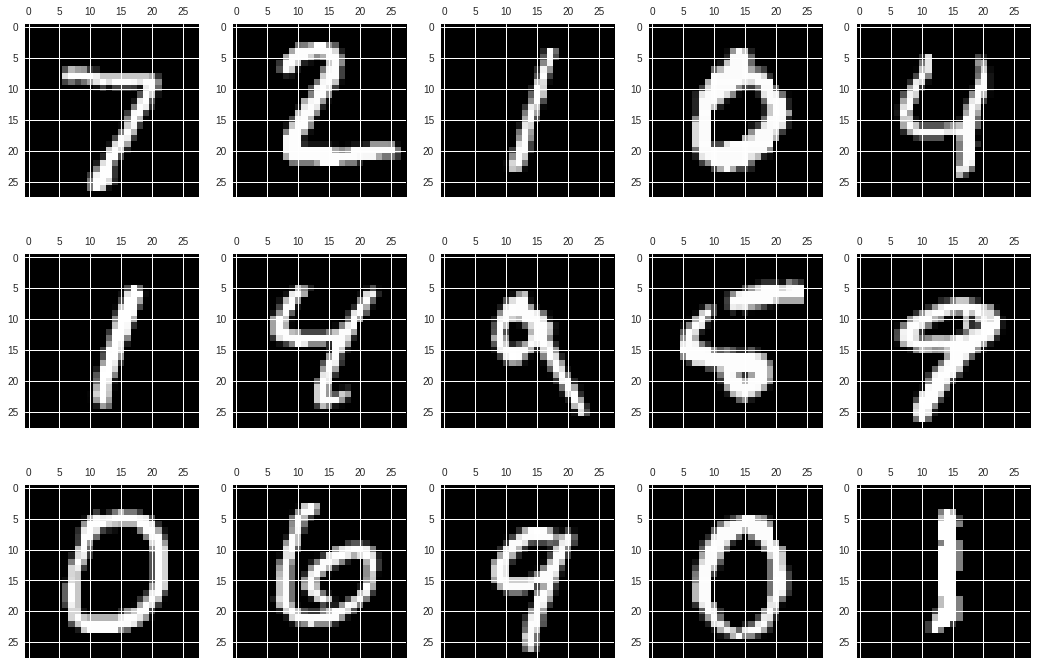

In [0]:
import pandas as pd

pasttime = nowtime(pasttime)

l1 = X_test.dot(w1)
o1 = sigmoid(l1)
l2 = o1.dot(w2)
o2 = sigmoid(l2)

figure, axes = plt.subplots(nrows=3, ncols=5)
figure.set_size_inches(18, 12)

plt.gray()
print("label = {0}".format(y_test[0:15]))

cnt = 0
row = 0
for i in range(3):
    axes[i][0].matshow(X_test[cnt + 0].reshape(28, 28))
    axes[i][1].matshow(X_test[cnt + 1].reshape(28, 28))
    axes[i][2].matshow(X_test[cnt + 2].reshape(28, 28))
    axes[i][3].matshow(X_test[cnt + 3].reshape(28, 28))
    axes[i][4].matshow(X_test[cnt + 4].reshape(28, 28))
    cnt += 5

predict = np.argmax(o2, axis=1)

accuracy = (y_test == predict).mean()
print("Accuracy = {0:.5f}".format(accuracy))

pasttime = nowtime(pasttime)


### => Test0 result

learning_rate = 0.0001<br>
w1 = np.random.uniform(low=-0.058, high=+0.058, size=(784, 1000))  <br>
w2 = np.random.uniform(low=-0.077, high=+0.077, size=(1000, 10))  <br>
num_epoch = 100<br>


*train 데이터로 모델링시 -> epoch : 99, error : 0.89<br>
*트레이닝 시간 :16m

*모델에 test 데이터 적용시 Accuracy = 0.10100<br>

=> 정확도 매우 낮음

# Test1

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [0]:
def nowtime(past):
  now = time.time()
  print(now)
  print('period[second] : {}'.format(now-past))
  return now

In [0]:
from keras.datasets import mnist
((X_train, y_train), (X_test, y_test)) = mnist.load_data()

label = [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


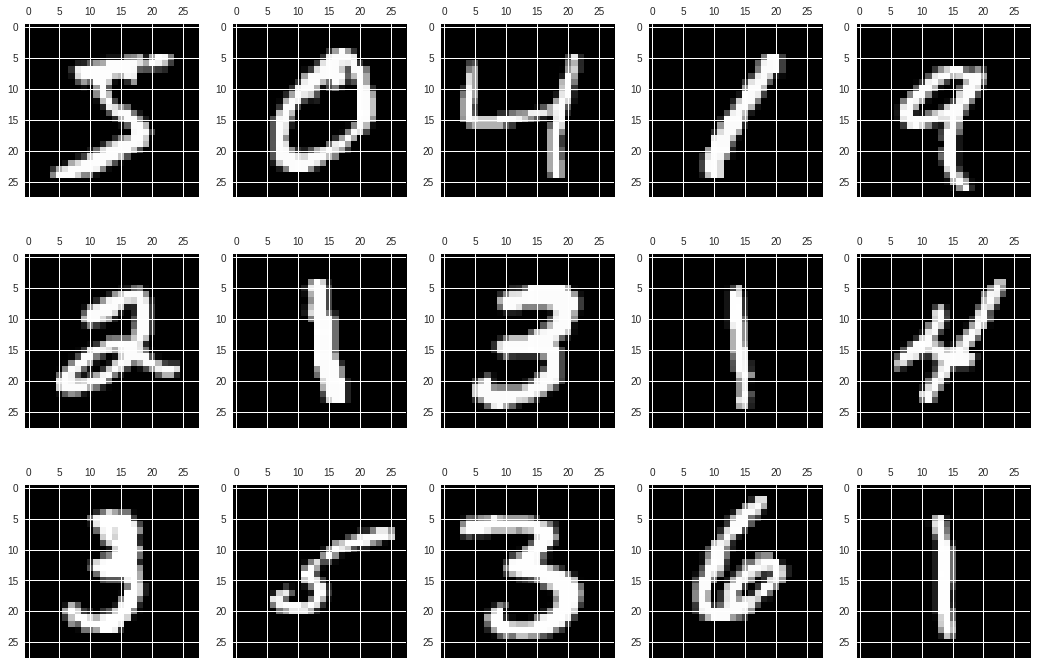

In [44]:
figure, axes = plt.subplots(nrows=3, ncols=5)
figure.set_size_inches(18, 12)

plt.gray()
print('label = {0}'.format(y_train[0:15]))

cnt = 0
row = 0
for i in range(3):
  axes[i][0].matshow(X_train[cnt+0])
  axes[i][1].matshow(X_train[cnt+1])
  axes[i][2].matshow(X_train[cnt+2])
  axes[i][3].matshow(X_train[cnt+3])
  axes[i][4].matshow(X_train[cnt+4])
  cnt += 5

In [45]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [46]:
y_train_hot = np.eye(10)[y_train]

print(y_train[0:5])
y_train_hot[0:5]

[5 0 4 1 9]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [47]:
y_test_hot = np.eye(10)[y_test]

print(y_test[0:5])
y_test_hot[0:5]

[7 2 1 0 4]


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [0]:
def sigmoid(n):
  return 1 / (1+np.exp(-n))

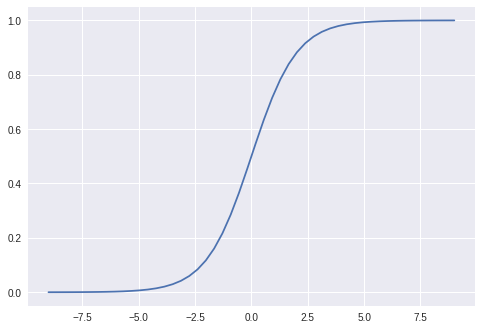

In [0]:
xx = np.linspace(start=-9.0, stop=+9.0)
yy = sigmoid(xx)

plt.plot(xx, yy)

In [0]:
print(sigmoid(-9))
print(sigmoid(0))
print(sigmoid(+9))

0.00012339457598623172
0.5
0.9998766054240137


In [0]:
learning_rate = 0.01

w1 = np.random.uniform(low=-1, high=+1, size=(784, 1000))
w2 = np.random.uniform(low=-1, high=+1, size=(1000, 1000))
w3 = np.random.uniform(low=-1, high=+1, size=(1000,10))

num_epoch = 100

In [0]:
import time
pasttime=0

In [54]:
pasttime=time.time()

for epoch in range(num_epoch):
  # Forward propagation
  layer1 = X_train.dot(w1)
  layer1_out = sigmoid(layer1)
  layer2 = layer1_out.dot(w2)
  layer2_out = sigmoid(layer2)
  layer3 = layer2_out.dot(w3)
  layer3_out = sigmoid(layer3)
  
  predict = np.argmax(layer3_out, axis=1)
  error = (predict != y_train).mean()
  if error < 0.01:
    break
    
  if epoch % 10 == 0:
    print('{0:3} error = {1:.5f}'.format(epoch, error))
    print('{0:3} w1(mean) = {1:.5f}, w1(std) = {2:.5f}'.format(epoch, w1.mean(), w1.std() ))
    print('{0:3} w2(mean) = {1:.5f}, w2(std) = {2:.5f}'.format(epoch, w2.mean(), w2.std() ))
    print('{0:3} w3(mean) = {1:.5f}, w3(std) = {2:.5f}'.format(epoch, w3.mean(), w3.std() ))
    (' ---- ' *11)
    
  # Backpropagation
  d3 = layer3_out - y_train_hot
  d2 = d3.dot(w3.T) * layer2_out * (1-layer2_out)
  d1 = d2.dot(w2.T) * layer1_out * (1-layer1_out)
  
  w3 = w3 - learning_rate * layer2_out.T.dot(d3)
  w2 = w2 - learning_rate * layer1_out.T.dot(d2)
  w1 = w1 - learning_rate * X_train.T.dot(d1)
  
print('{0:3} error = {1:.5f}'.format(epoch, error))
pasttime=nowtime(pasttime)
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


  0 error = 0.90137
  0 w1(mean) = 0.00020, w1(std) = 0.57739
  0 w2(mean) = -0.26616, w2(std) = 12.56256
  0 w3(mean) = -152.39342, w3(std) = 160.46714
 10 error = 0.90137
 10 w1(mean) = -2.90347, w1(std) = 123.74441
 10 w2(mean) = -14.77653, w2(std) = 178.02600
 10 w3(mean) = -152.63342, w3(std) = 161.09067
 20 error = 0.89782
 20 w1(mean) = -2.90347, w1(std) = 123.74441
 20 w2(mean) = -14.77653, w2(std) = 178.02600
 20 w3(mean) = -152.63342, w3(std) = 164.24751
 30 error = 0.88763
 30 w1(mean) = -2.90347, w1(std) = 123.74441
 30 w2(mean) = -14.77653, w2(std) = 178.02600
 30 w3(mean) = -152.63342, w3(std) = 170.16028
 40 error = 0.89782
 40 w1(mean) = -2.90347, w1(std) = 123.74441
 40 w2(mean) = -14.77684, w2(std) = 178.02597
 40 w3(mean) = -180.17342, w3(std) = 185.69515
 50 error = 0.89782
 50 w1(mean) = -2.90347, w1(std) = 123.74441
 50 w2(mean) = -14.77684, w2(std) = 178.02597
 50 w3(mean) = -180.17342, w3(std) = 185.15442
 60 error = 0.90128
 60 w1(mean) = -2.90347, w1(std) = 12

In [0]:
import pandas as pd

In [56]:
l1 = X_test.dot(w1)
o1 = sigmoid(l1)
l2 = o1.dot(w2)
o2 = sigmoid(l2)
l3 = o2.dot(w3)
o3 = sigmoid(l3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


label = [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]
Accuracy = 0.09800


,y(actual),y(predict)
0,7,0
1,2,0
2,1,0
3,0,0
4,4,0
5,1,0
6,4,0
7,9,0
8,5,0
9,9,0


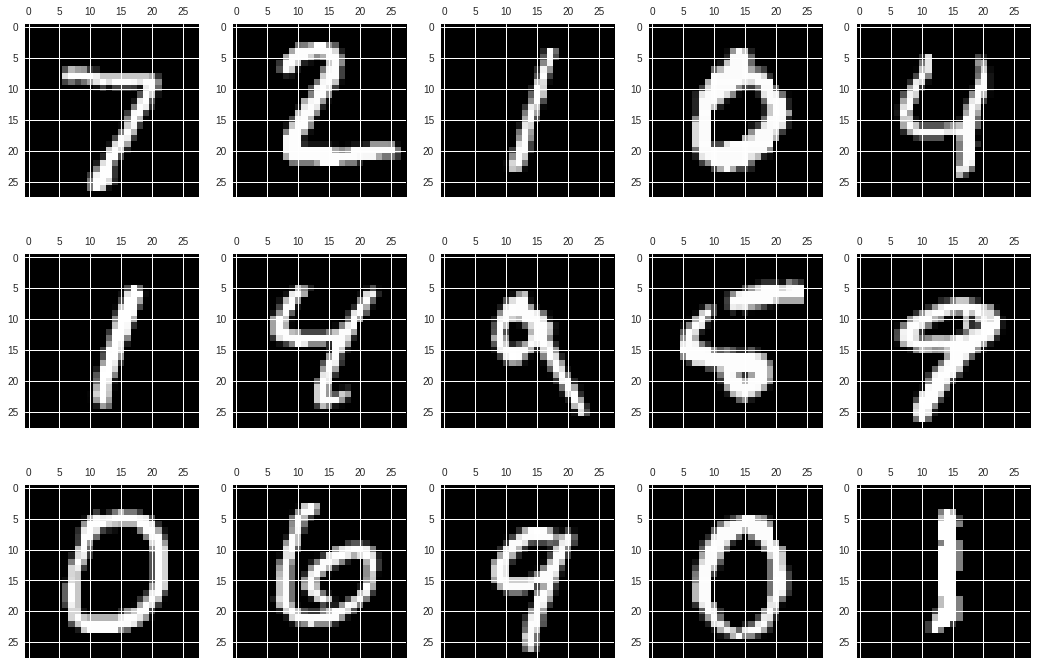

In [58]:
figure, axes = plt.subplots(nrows=3, ncols=5)
figure.set_size_inches(18, 12)

plt.gray()
print('label = {0}'.format(y_test[0:15]))

cnt = 0
row = 0
for i in range(3):
  axes[i][0].matshow(X_test[cnt+0].reshape(28, 28))
  axes[i][1].matshow(X_test[cnt+1].reshape(28, 28))
  axes[i][2].matshow(X_test[cnt+2].reshape(28, 28))
  axes[i][3].matshow(X_test[cnt+3].reshape(28, 28))
  axes[i][4].matshow(X_test[cnt+4].reshape(28, 28))
  cnt += 5
  
predict = np.argmax(o3, axis=1)

accuracy = (y_test == predict).mean()
print('Accuracy = {0:.5f}'.format(accuracy))

pd.DataFrame({'y(actual)': y_test, 'y(predict)': predict}).head(15)

### => Test1 result

learning_rate = 0.01<br>

w1 = np.random.uniform(low=-1, high=+1, size=(784, 1000))<br>
w2 = np.random.uniform(low=-1, high=+1, size=(1000, 1000))<br>
w3 = np.random.uniform(low=-1, high=+1, size=(1000,10))<br>

num_epoch = 100<br>


*train 데이터로 모델링시 -> epoch : 99 error = 0.89782<br>
*트레이닝 시간 :40m 20s

*모델에 test 데이터 적용시 Accuracy = 0.09800<br>

=> 정확도 매우 낮음`
은닉층 갯수 늘이니 오래 걸린다. 결과와는 별개로.

## test2



In [0]:
from datetime import datetime

In [0]:
pasttime = 0 


In [67]:
pasttime = nowtime(past_time)

learning_rate = 0.00001

w1 = np.random.uniform(low=-0.058, high=+0.058, size=(784, 1000))
w2 = np.random.uniform(low=-0.077, high=+0.077, size=(1000, 10))

b1 = np.random.uniform(low=0, high=0, size=(1, 1000))
b2 = np.random.uniform(low=0, high=0, size=(1, 10))

num_epoch = 100


for epoch in range(num_epoch):
  # Forward propagation
  l1 = X_train.dot(w1) + b1
  o1 = sigmoid(l1)
  l2 = o1.dot(w2) + b2
  o2 = sigmoid(l2)
  
  predict = np.argmax(o2, axis=1)
  error = (predict != y_train).mean()
  if error < 0.1:
    break
    
  if epoch % 10 == 0:
    print('{0:3} error = {1:.5f}'.format(epoch, error))
    print('{0:3} w1(mean) = {1:.5f}, w1(std) = {2:.5f}'.format(epoch, w1.mean(), w1.std()))
    print('{0:3} w2(mean) = {1:.5f}, w2(std) = {2:.5f}'.format(epoch, w2.mean(), w2.std()))
    print('{0:3} b1(mean) = {1:.5f}, b1(std) = {2:.5f}'.format(epoch, b1.mean(), b1.std()))
    print('{0:3} b2(mean) = {1:.5f}, b2(std) = {2:.5f}'.format(epoch, b2.mean(), b2.std()))
    
  # Backpropagation
  d2 = o2 - y_train_hot
  d1 = d2.dot(w2.T) * o1 * (1 - o1)
  
  w2 = w2 -learning_rate * o1.T.dot(d2)
  b2 = b2 -learning_rate * d2.mean(axis=0)
  w1 = w1 -learning_rate * X_train.T.dot(d1)
  b1 = b1 -learning_rate * d1.mean(axis=0)
 


print('{0:3} error = {1:.5f}'.format(epoch, error))
  
pasttime = nowtime(pasttime)

1552365684.719628
period[second] : 1552365684.719628
  0 error = 0.91795
  0 w1(mean) = -0.00001, w1(std) = 0.03347
  0 w2(mean) = -0.00033, w2(std) = 0.04374
  0 b1(mean) = 0.00000, b1(std) = 0.00000
  0 b2(mean) = 0.00000, b2(std) = 0.00000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


 10 error = 0.88763
 10 w1(mean) = -0.00465, w1(std) = 0.03682
 10 w2(mean) = -0.12940, w2(std) = 0.13441
 10 b1(mean) = -0.00000, b1(std) = 0.00000
 10 b2(mean) = -0.00001, b2(std) = 0.00000
 20 error = 0.88763
 20 w1(mean) = -0.00526, w1(std) = 0.03729
 20 w2(mean) = -0.13274, w2(std) = 0.13879
 20 b1(mean) = -0.00000, b1(std) = 0.00000
 20 b2(mean) = -0.00001, b2(std) = 0.00000
 30 error = 0.88763
 30 w1(mean) = -0.00574, w1(std) = 0.03769
 30 w2(mean) = -0.13545, w2(std) = 0.14583
 30 b1(mean) = -0.00000, b1(std) = 0.00000
 30 b2(mean) = -0.00001, b2(std) = 0.00000
 40 error = 0.89558
 40 w1(mean) = -0.00592, w1(std) = 0.03791
 40 w2(mean) = -0.13625, w2(std) = 0.15179
 40 b1(mean) = -0.00000, b1(std) = 0.00000
 40 b2(mean) = -0.00001, b2(std) = 0.00000
 50 error = 0.88763
 50 w1(mean) = -0.00613, w1(std) = 0.03828
 50 w2(mean) = -0.13430, w2(std) = 0.15622
 50 b1(mean) = -0.00000, b1(std) = 0.00000
 50 b2(mean) = -0.00001, b2(std) = 0.00000
 60 error = 0.79793
 60 w1(mean) = -0.00

In [68]:
import pandas as pd

l1 = X_test.dot(w1)
o1 = sigmoid(l1)
l2 = o1.dot(w2)
o2 = sigmoid(l2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


label = [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]
Accuracy = 0.36450


,y(actual),y(predict)
0,7,9
1,2,3
2,1,1
3,0,3
4,4,3
5,1,1
6,4,3
7,9,3
8,5,6
9,9,9


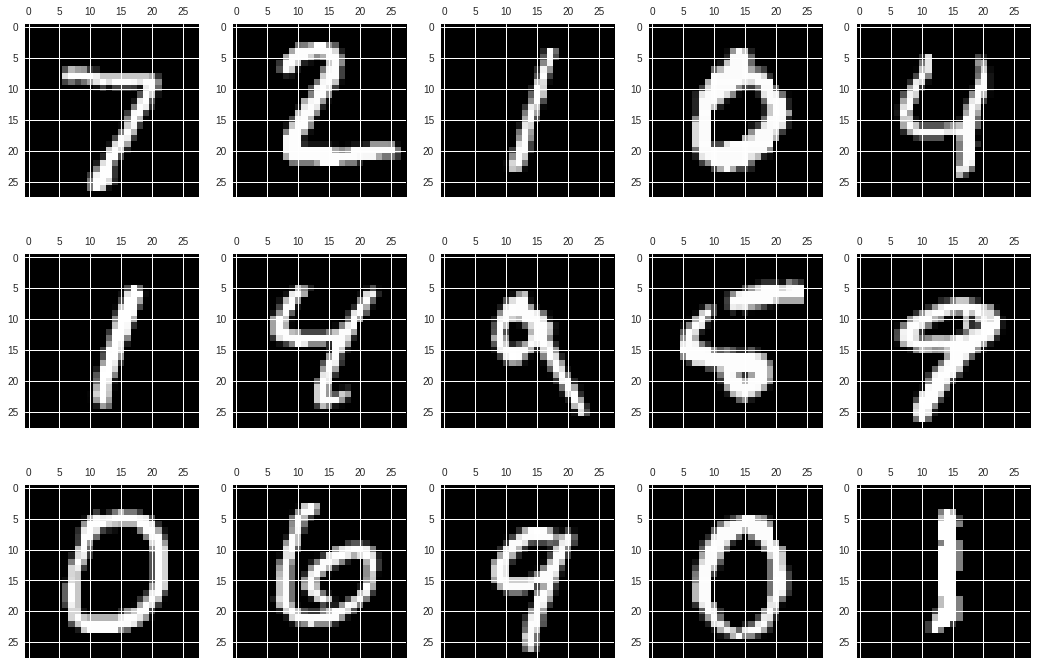

In [69]:
figure, axes = plt.subplots(nrows=3, ncols=5)
figure.set_size_inches(18, 12)

plt.gray()
print('label = {0}'.format(y_test[0:15]))

cnt=0
row=0

for i in range(3):
  axes[i][0].matshow(X_test[cnt+0].reshape(28, 28))
  axes[i][1].matshow(X_test[cnt+1].reshape(28, 28))
  axes[i][2].matshow(X_test[cnt+2].reshape(28, 28))
  axes[i][3].matshow(X_test[cnt+3].reshape(28, 28))
  axes[i][4].matshow(X_test[cnt+4].reshape(28, 28))
  cnt += 5
  
predict = np.argmax(o2, axis=1)

accuracy = (y_test == predict).mean()
print('Accuracy = {0:.5f}'.format(accuracy))

pd.DataFrame({'y(actual)' : y_test, 'y(predict)' : predict}).head(15)

### => Test2 result

learning_rate = 0.00001

w1 = np.random.uniform(low=-0.058, high=+0.058, size=(784, 1000))
w2 = np.random.uniform(low=-0.077, high=+0.077, size=(1000, 10))

b1 = np.random.uniform(low=0, high=0, size=(1, 1000))
b2 = np.random.uniform(low=0, high=0, size=(1, 10))

num_epoch = 100


*train 데이터로 모델링시 -> epoch :  99 error = 0.52718<br>
*트레이닝 시간 :17m

*모델에 test 데이터 적용시 Accuracy = 0.36450<br>


=> 테스트 데이터에 적용한 정확도 26% 상승으로 36%<br>
바이어스 추가의 중요성!

# test3

In [70]:
pasttime = nowtime(past_time)

learning_rate = 0.00001

w1 = np.random.uniform(low=-0.058, high=+0.058, size=(784, 1000))
w2 = np.random.uniform(low=-0.077, high=+0.077, size=(1000, 10))

b1 = np.random.uniform(low=0, high=0, size=(1, 1000))
b2 = np.random.uniform(low=0, high=0, size=(1, 10))

num_epoch = 1000


for epoch in range(num_epoch):
  # Forward propagation
  l1 = X_train.dot(w1) + b1
  o1 = sigmoid(l1)
  l2 = o1.dot(w2) + b2
  o2 = sigmoid(l2)
  
  predict = np.argmax(o2, axis=1)
  error = (predict != y_train).mean()
  if error < 0.1:
    break
    
  if epoch % 10 == 0:
    print('{0:3} error = {1:.5f}'.format(epoch, error))
    print('{0:3} w1(mean) = {1:.5f}, w1(std) = {2:.5f}'.format(epoch, w1.mean(), w1.std()))
    print('{0:3} w2(mean) = {1:.5f}, w2(std) = {2:.5f}'.format(epoch, w2.mean(), w2.std()))
    print('{0:3} b1(mean) = {1:.5f}, b1(std) = {2:.5f}'.format(epoch, b1.mean(), b1.std()))
    print('{0:3} b2(mean) = {1:.5f}, b2(std) = {2:.5f}'.format(epoch, b2.mean(), b2.std()))
    
  # Backpropagation
  d2 = o2 - y_train_hot
  d1 = d2.dot(w2.T) * o1 * (1 - o1)
  
  w2 = w2 -learning_rate * o1.T.dot(d2)
  b2 = b2 -learning_rate * d2.mean(axis=0)
  w1 = w1 -learning_rate * X_train.T.dot(d1)
  b1 = b1 -learning_rate * d1.mean(axis=0)
 


print('{0:3} error = {1:.5f}'.format(epoch, error))
  
pasttime = nowtime(pasttime)

1552370877.6605923
period[second] : 1552370877.6605923
  0 error = 0.89227
  0 w1(mean) = 0.00001, w1(std) = 0.03349
  0 w2(mean) = 0.00056, w2(std) = 0.04454
  0 b1(mean) = 0.00000, b1(std) = 0.00000
  0 b2(mean) = 0.00000, b2(std) = 0.00000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


 10 error = 0.89782
 10 w1(mean) = -0.00499, w1(std) = 0.03851
 10 w2(mean) = -0.15238, w2(std) = 0.13211
 10 b1(mean) = -0.00000, b1(std) = 0.00000
 10 b2(mean) = -0.00001, b2(std) = 0.00000
 20 error = 0.89782
 20 w1(mean) = -0.00582, w1(std) = 0.03897
 20 w2(mean) = -0.16068, w2(std) = 0.13849
 20 b1(mean) = -0.00000, b1(std) = 0.00000
 20 b2(mean) = -0.00001, b2(std) = 0.00000
 30 error = 0.89782
 30 w1(mean) = -0.00603, w1(std) = 0.03914
 30 w2(mean) = -0.14925, w2(std) = 0.14515
 30 b1(mean) = -0.00000, b1(std) = 0.00000
 30 b2(mean) = -0.00001, b2(std) = 0.00000
 40 error = 0.81253
 40 w1(mean) = -0.00623, w1(std) = 0.03927
 40 w2(mean) = -0.12762, w2(std) = 0.13876
 40 b1(mean) = -0.00000, b1(std) = 0.00000
 40 b2(mean) = -0.00000, b2(std) = 0.00000
 50 error = 0.79587
 50 w1(mean) = -0.00627, w1(std) = 0.03944
 50 w2(mean) = -0.12835, w2(std) = 0.13991
 50 b1(mean) = -0.00000, b1(std) = 0.00000
 50 b2(mean) = -0.00000, b2(std) = 0.00000
 60 error = 0.79310
 60 w1(mean) = -0.00

In [71]:
import pandas as pd

l1 = X_test.dot(w1)
o1 = sigmoid(l1)
l2 = o1.dot(w2)
o2 = sigmoid(l2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


label = [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]
Accuracy = 0.90940


,y(actual),y(predict)
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


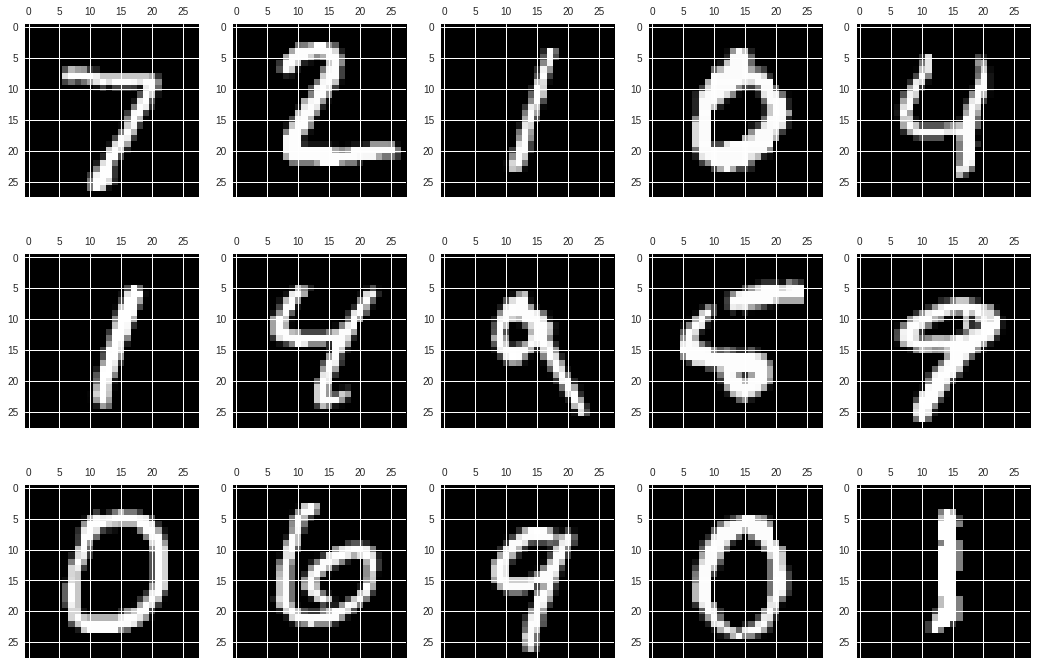

In [72]:
figure, axes = plt.subplots(nrows=3, ncols=5)
figure.set_size_inches(18, 12)

plt.gray()
print('label = {0}'.format(y_test[0:15]))

cnt=0
row=0

for i in range(3):
  axes[i][0].matshow(X_test[cnt+0].reshape(28, 28))
  axes[i][1].matshow(X_test[cnt+1].reshape(28, 28))
  axes[i][2].matshow(X_test[cnt+2].reshape(28, 28))
  axes[i][3].matshow(X_test[cnt+3].reshape(28, 28))
  axes[i][4].matshow(X_test[cnt+4].reshape(28, 28))
  cnt += 5
  
predict = np.argmax(o2, axis=1)

accuracy = (y_test == predict).mean()
print('Accuracy = {0:.5f}'.format(accuracy))

pd.DataFrame({'y(actual)' : y_test, 'y(predict)' : predict}).head(15)

### => Test3 result

learning_rate = 0.00001

w1 = np.random.uniform(low=-0.058, high=+0.058, size=(784, 1000))
w2 = np.random.uniform(low=-0.077, high=+0.077, size=(1000, 10))

b1 = np.random.uniform(low=0, high=0, size=(1, 1000))
b2 = np.random.uniform(low=0, high=0, size=(1, 10))

num_epoch = 1000<br>


*train 데이터로 모델링시 -> epoch :  256 error = 0.09170<br>
*트레이닝 시간 :44m
  
*모델에 test 데이터 적용시 Accuracy = 0.90940<br>

=> 테스트 데이터에 적용한 정확도 상승으로 91%
학습 반복 횟수(애폭)을 늘렸더니 놀라운 결과!